# Dimensionality reduction

In [1]:
import math
from sklearn import datasets

In [2]:
# classification data
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target

## 1) Feature selection

**a) unsupervised**

In [3]:
from sklearn.feature_selection import VarianceThreshold

In [4]:
selection = VarianceThreshold().fit(X_iris)
print("Feature variance =",selection.variances_)

Feature variance = [0.68112222 0.18871289 3.09550267 0.57713289]


In [5]:
X_new = VarianceThreshold(threshold=0.5).fit_transform(X_iris)
print("Number of features =",len(X_new[0]))

Number of features = 3


**b) classification**

In [6]:
from sklearn.feature_selection import f_classif, SelectKBest, SelectPercentile

In [7]:
selector = SelectPercentile(f_classif, percentile=50)
selector.fit(X_iris, y_iris)
print("p-values:",selector.pvalues_)
print("scores:",selector.scores_)

p-values: [1.66966919e-31 4.49201713e-17 2.85677661e-91 4.16944584e-85]
scores: [ 119.26450218   49.16004009 1180.16118225  960.0071468 ]


In [8]:
X_new = selector.fit_transform(X_iris, y_iris)
print("Original data space:\n",X_iris[0:3],"\nNew data space:\n",X_new[0:3])

Original data space:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]] 
New data space:
 [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]]


In [9]:
X_new = SelectKBest(f_classif, k=3).fit_transform(X_iris, y_iris)
print("Original data space:\n",X_iris[0:3],"\nNew data space:\n",X_new[0:3])

Original data space:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]] 
New data space:
 [[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]]


## 2) Principal Component Analysis (PCA)

In [10]:
from sklearn.decomposition import PCA

In [11]:
# learn the transformation (components as linear combination of features)
pca = PCA(n_components=3, svd_solver='full')
pca.fit(X_iris)
print("Components:\n",pca.components_)

Components:
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]]


In [12]:
# access the explained variance (using eigenvalues)
print("Explained variance =",pca.explained_variance_ratio_)

Explained variance = [0.92461872 0.05306648 0.01710261]


In [13]:
X_pca = pca.transform(X_iris)
print("Original data shape:\n",X_iris[0:3],"\n\nTransformed data shape:\n",X_pca[0:3])

Original data shape:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]] 

Transformed data shape:
 [[-2.68412563  0.31939725 -0.02791483]
 [-2.71414169 -0.17700123 -0.21046427]
 [-2.88899057 -0.14494943  0.01790026]]


Use top 2 eigenvectors and eigenvalues to compute the importance of original features in the new space

In [14]:
# 1 scale principal components
xvector = pca.components_[0] * max(X_pca[:,0]) 
yvector = pca.components_[1] * max(X_pca[:,1])

# 2 compute column importance and sort
columns = iris['feature_names']
impt_features = {columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(len(columns))}
print("Features by importance:\n", sorted(zip(impt_features.values(),impt_features.keys()),reverse=True))

Features by importance:
 [(3.2603340774631047, 'petal length (cm)'), (1.641835479102883, 'sepal length (cm)'), (1.363888538832505, 'petal width (cm)'), (1.0534039455009274, 'sepal width (cm)')]


## 3) Visualization and data recovery

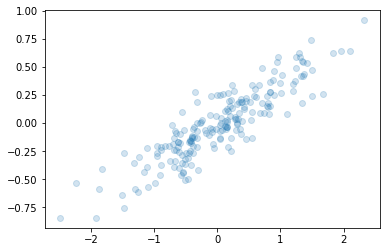

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# generate synthetic data |X|=200, 2 classes
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

In [16]:
# compute PCA solution
pca = PCA(n_components=2)
pca.fit(X)
print("Components (eigenvectors):\n",pca.components_)
print("Explained variance (eigenvalues) =",pca.explained_variance_)
print("Explained variance (ratio) =",pca.explained_variance_ratio_)

Components (eigenvectors):
 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
Explained variance (eigenvalues) = [0.7625315 0.0184779]
Explained variance (ratio) = [0.97634101 0.02365899]


(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

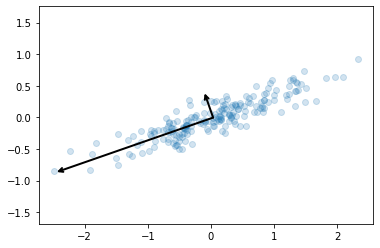

In [17]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    draw_vector(pca.mean_, pca.mean_ + vector * 3 * np.sqrt(length))
plt.axis('equal')

Projecting data into the new space and recovering the original space

In [18]:
X[0:5]

array([[-0.62530162, -0.17006366],
       [ 0.96069503,  0.5909006 ],
       [-0.59854339, -0.40259339],
       [-2.22805938, -0.53257674],
       [-0.46143006, -0.49886724]])

In [19]:
X_pca = pca.transform(X)
X_pca[0:5]

array([[ 0.67676923,  0.0597386 ],
       [-1.07121393,  0.25724006],
       [ 0.72791236, -0.16866994],
       [ 2.30964136,  0.24406657],
       [ 0.63005232, -0.30465571]])

Recovering the original data from the reduced data

In [20]:
X_back = pca.inverse_transform(X_pca)
X_back[0:5]

array([[-0.62530162, -0.17006366],
       [ 0.96069503,  0.5909006 ],
       [-0.59854339, -0.40259339],
       [-2.22805938, -0.53257674],
       [-0.46143006, -0.49886724]])

## 4) PCA on the Iris dataset

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [22]:
pca = PCA(n_components=2)
X_pca = pca.fit(X_iris).transform(X_iris)
print('PCA explained variance (first two components):',pca.explained_variance_ratio_)

PCA explained variance (first two components): [0.92461872 0.05306648]


<Figure size 432x288 with 0 Axes>

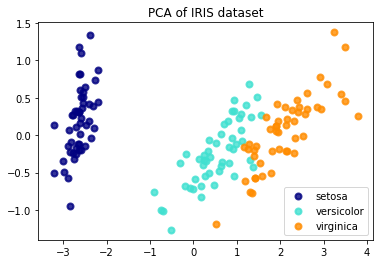

<Figure size 432x288 with 0 Axes>

In [23]:
plt.figure()
target_names = iris.target_names
colors = ['navy', 'turquoise', 'darkorange']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y_iris==i,0],X_pca[y_iris==i,1],color=color,alpha=.8,lw=2,label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.figure()

